# Self Deriving Car

In [1]:
from __future__ import division
import os
import random
import numpy as np
from scipy import pi
from itertools import islice
from scipy import misc
import pandas as pd

# Perform simple Eploratory data analysis(EDA) on Steering angle

DataFolder = 'D:\DataSet for ML\Selfdriving_dataset'
Train_file = os.path.join(DataFolder, 'data.txt')
# split data into train and test
# 80% shuffle to train-->means 20 mint video(convert into images-->as we known that video is sequence of images)

splits = 0.8
x = []
y = []

start = 0
stop = 45405
with open(Train_file, encoding='UTF-8') as fp:
    for line in islice(fp,start,stop):
        path , angle = line.strip().split()
        full_path = os.path.join(DataFolder,path)
        x.append(full_path)
        
#         convert angle from degree into radian
        y.append(float(angle) * pi/ 180)

y = np.array(y)
print('Complete proceesing data.txt',y)

# here we split data into train(80%-->20mint video) and test(20%-->5 mint video)
split_index = int(len(y)*0.8)
train_y = y[:split_index]
print("train_data: ",train_y.shape)
test_y = y[split_index:]

Complete proceesing data.txt [0.         0.         0.         ... 0.03874631 0.03874631 0.03874631]
train_data:  (36324,)


In [2]:
print(train_y.shape)
print(test_y.shape)

(36324,)
(9081,)


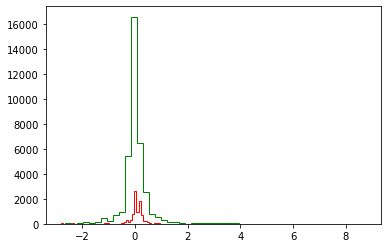

In [3]:
import matplotlib.pyplot as plt
plt.hist(train_y, bins=50, color='green', histtype='step');
plt.hist(test_y, bins=50,  color='red', histtype='step');
plt.show()

In [4]:
print(test_y)

[-0.19355701 -0.18832103 -0.17592919 ...  0.03874631  0.03874631
  0.03874631]


In [5]:
# islice(iterable,start, stop, step)
# we must passed at least 2 argumnet
for i in islice(range(20),1):
    print(i)
    


0


In [6]:
for i in range(20):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


# Simple Mean BaseModel

In [7]:


# take mean of train_y and then we used it as predictor for test_y
train_mean_y = np.mean(train_y)

# simple Regression prooblem --> input sequence of images and output realvaue
# So the performance matric for regression problem is ---> MSE(mean squared error)

# Ideal value for MSE = 0(impossible for machine)
print("Test MSE(MEAN): ", np.mean(np.square(test_y-train_mean_y)))
print("Test MSE(zero)", np.mean(np.square(test_y-0)))

Test MSE(MEAN):  0.1911477887692512
Test MSE(zero) 0.19091206441753242


In [8]:
# before we study convNets as classification
# in this problem we study convNets as Regression
# Deeplearning model for Regression

# problem:
#     input: sequence of images ---> we need to predict steering wheel angel
#      -->this is the problem of Regression who we pose this problem in deeeplearning

# we pose this problem in 2 ways


# case1:
#         input: images(discard sequ.of images) ---> predict real value
#         For this convnets work very well(b/z it design specially for image processing)


# case2:
#         Input: video(sequence of images) --> predict sequence of real value
#         for this we used the combination of CNN-RNN(LSTM)
#         images ------> CNN ---->output will be vector representation----->LSTM------>Y^(predicted value)
#          

#        Actual self dirving car used very complext (CNN-RNN)



# but we used case1 

In [9]:
# END to END Model
  # input: image ---->CNN model ---> predict steering angle 
    
# Earlied people not use end-to-end model
# 1:detect road
# 2: detect lane
# 3: detect angle
# 4: detect rotaton
# 5: detect cars
# 6: detect breaker
    
# For every thing they have separate model
    

# Batch_load the dataset

In [15]:
# before 
# 1: i load the data
# 2: split and shuffle the data b/w train and test

# Now batches of data

# import cv2
import imageio
from PIL import Image
import scipy.misc
import random
xs = []
ys = []

# pointer will be point the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0

# read data.txt
with open("D:\DataSet for ML\Selfdriving_dataset\data.txt") as f:
    for line in f:
        xs.append("Selfdriving_dataset/" + line.split()[0])
#         print(xs)
         #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1])* pi/180)
#         print(ys)
        
        
# get number of images:
Total_num_images = len(xs)
# print(Total_num_images)

# get number of label image(steering wheel angel)
# if number of images == number of label image
# then we have no missing images

num_lable_of_images = len(ys)
# print(num_lable_of_images) 


# data shuffle into train_x and train_y, val_x and val_y
train_xs = xs[:int(len(xs) * 0.8)]
train_ys = ys[:int(len(xs) * 0.8)]

val_xs = xs[-int(len(xs) * 0.2):]
val_ys = ys[-int(len(xs) * 0.2):]

# print(len(train_ys))
# print(val_ys)
num_train_images = len(train_xs)
num_val_images =  len(val_xs)

print(num_train_images)
print(num_val_images)


def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer+i) % num_train_images])))
#          imge = Image.open(imageio.imread(train_xs[(train_batch_pointer+i) % num_train_images]))
#         x_out.append = imge.resize
        y_out.append([train_ys[(train_batch_pointer+i)%num_train_images]])
        
    train_batch_pointer += batch_size
    return x_out, y_out

    
def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in random(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(val_xs[(val_batch_pointer + i) % num_val_images])))
#         x_out.append(imageio.imresize(imageio.imread(val_xs[(val_batch_pointer + i) % num_val_images])))
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer  += batch_size
    return x_out, y_out

36324
9081


# End to End CNN model build

In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import scipy
def weight_variable(shape):
    initial = tf.truncated_normal(shape , stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, stride):
    return tf.nn.conv2d(x,W,strides=[1,stride,stride,1], padding='VALID')

x = tf.placeholder(tf.float32, shape=[None, 66,200,3])
y_= tf.placeholder(tf.float32, shape=[None ,1])

x_image = x

# first convnet layer
w_conv1 = weight_variable([5,5,3,24])
b_conv1 = bias_variable([24])

h_conve1 = tf.nn.relu(conv2d(x_image, w_conv1, 2)+b_conv1)

# 2nd convnet layer
w_conv2 = weight_variable([5,5,24,36])
b_conv2 = bias_variable([36])

h_conve2 = tf.nn.relu(conv2d(h_conve1, w_conv2, 2)+b_conv2)
    
#3rd convet layer
w_conv3 = weight_variable([5,5,36,48])
b_conv3 = bias_variable([48])

h_conve3 = tf.nn.relu(conv2d(h_conve2, w_conv3, 2)+b_conv3)

# 4th convet layer
w_conv4 = weight_variable([3,3,48,64])
b_conv4 = bias_variable([64])

h_conve4 = tf.nn.relu(conv2d(h_conve3, w_conv4, 1)+b_conv4)

# 5th convet layer
w_conv5 = weight_variable([3,3,64,64])
b_conv5 = bias_variable([64])

h_conve5 = tf.nn.relu(conv2d(h_conve4, w_conv5, 1)+b_conv5)



# Full connected layer

# 1 FC layer
w_fc1 = weight_variable([1152,1164])
b_fc1 = bias_variable([1164])

h_conv5_flat = tf.reshape(h_conve5,[-1,1152])
h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat,w_fc1)+ b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 2 FC layer
w_fc2 = weight_variable([1164,100])
b_fc2 = bias_variable([100])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop,w_fc2)+ b_fc2)
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

# 3 FC layer
w_fc3 = weight_variable([100,50])
b_fc3 = bias_variable([50])

h_fc3 = tf.nn.relu(tf.matmul(h_fc2_drop, w_fc3)+ b_fc3)
h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)


# 4 FC layer
w_fc4 = weight_variable([50,10])
b_fc4 = bias_variable([10])

h_fc4 = tf.nn.relu(tf.matmul(h_fc3_drop, w_fc4)+ b_fc4)
h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)


# output
w_fc5 = weight_variable([10,1])
b_fc5 = bias_variable([1])

y = tf.multiply(tf.atan(tf.matmul(h_fc4_drop, w_fc5)+ b_fc5),2)

# After building model 
# Train Model

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.core.protobuf import saver_pb2
Logic_dir = './save'
sess = tf.InteractiveSession()
L2Normconst = 0.001
train_vars = tf.trainable_variables()
loss = tf.reduce_mean(tf.square(tf.subtract(y_ ,y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars])*L2Normconst
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
sess.run(tf.initialize_all_variables())

# create summay to monitor cost tensor
tf.summary.scalar("loss",loss)

saver = tf.train.Saver(write_version=saver_pb2.SaverDef.V1)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100
for epoch in range(epochs):
    for i in range(int(Total_num_images/batch_size)):
        xs , ys = LoadTrainBatch(batch_size)
        train_step.run(feed_dict={x:xs, y_:ys, keep_prob:0.8})
        if i % 10 == 0:
            xs, ys = LoadValBatch(batch_size)
            loss_val = loss.eval(feed_dict={x:xs, y_:ys, keep_prob:1.0})
            
# write logs to every iteration
    summary = merged_summary_op.eval(feed_dict={x:xs, y_: ys, keep_prob: 1.0})
    summary_writer.add_summary(summary, epoch * driving_data.num_images/batch_size + i)
    
    if i % batch_size==0:
        if not os.path.exists(Logic_dir):
            os.makedirs(Logic_dir)
        check_out_point = os.path.join(Logic_dir, "model.ckpt")
        filename = saver.save(sess, check_out_point)
print("Model save in file: %s" % filename)



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


AttributeError: module 'scipy.misc' has no attribute 'imresize'

In [18]:
import scipy.m
scipy.__version__


'1.7.3'